## Bike Sharing Regression Problem

***Business Goal***

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Loading Important Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.8 MB/s eta 0:00:00


In [29]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
import statsmodels.api as sm                                        # Importing statsmodel api
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go                                   # Importing plotly graphical interface
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### Load the Data set and display first 5 record

In [3]:
df = pd.read_csv('/content/sample_data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


**# Check the descriptive information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**as we Can see above the data we cann see there is 1 categorical data are present into the data set. and below are the observation**


*   There are total 730 Category present into the dataframe
*   There is no null value present into the dataset.
*   dteday is a categorical data present into the dataset.



**Check the Shape of Dataset**

In [5]:
df.shape

(730, 16)

As we observed that there are 730 Rows and 16 Columns are present into the dataset.

## Data Quality Check

**1. Check the Null and Missing value Present into the dataSet.**

In [6]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**2. Check the Duplicate values present into the datasets.**

In [7]:
df.duplicated().sum()

0

There is no duplicate entries are present into the data set

## Data Cleaning


### 1. Removing Redundant Column from the data set


*   **instant** : Its only an index value
*   **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
*   **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.




In [8]:
df.drop(columns= ['instant','dteday','casual','registered'], inplace= True )

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,985
1,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,801
2,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,1349
3,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,1562
4,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,1600


## 2. Converting the Season, weekday and working days into categorical convert into dummy


*   First convert into the Categorical
*   Convert categorical into Dummy and remove the first column



In [10]:
# Converting into the Categorical
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')

# Conveting into Dummies

#df_new = pd.get_dummies(df, drop_first=True)
#df_new.info()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,985
1,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,801
2,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,1349
3,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,1562
4,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,1600


In [13]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

df_new = pd.get_dummies(df, drop_first=True)
df_new = df_new.astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            730 non-null    int64
 1   holiday       730 non-null    int64
 2   workingday    730 non-null    int64
 3   temp          730 non-null    int64
 4   atemp         730 non-null    int64
 5   hum           730 non-null    int64
 6   windspeed     730 non-null    int64
 7   cnt           730 non-null    int64
 8   season_2      730 non-null    int64
 9   season_3      730 non-null    int64
 10  season_4      730 non-null    int64
 11  mnth_2        730 non-null    int64
 12  mnth_3        730 non-null    int64
 13  mnth_4        730 non-null    int64
 14  mnth_5        730 non-null    int64
 15  mnth_6        730 non-null    int64
 16  mnth_7        730 non-null    int64
 17  mnth_8        730 non-null    int64
 18  mnth_9        730 non-null    int64
 19  mnth_10       730 non-null   

In [14]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14,18,80,10,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14,17,69,16,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8,9,43,16,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**3. Spliting the data into train and test**

In [15]:
# Creating Dependent and Independent variable
X = df_new.drop(columns= ['cnt']) # Independent variable
y = df_new['cnt'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 29)
(146, 29)
(584,)
(146,)


# EXPLORATORY  Data Analysis

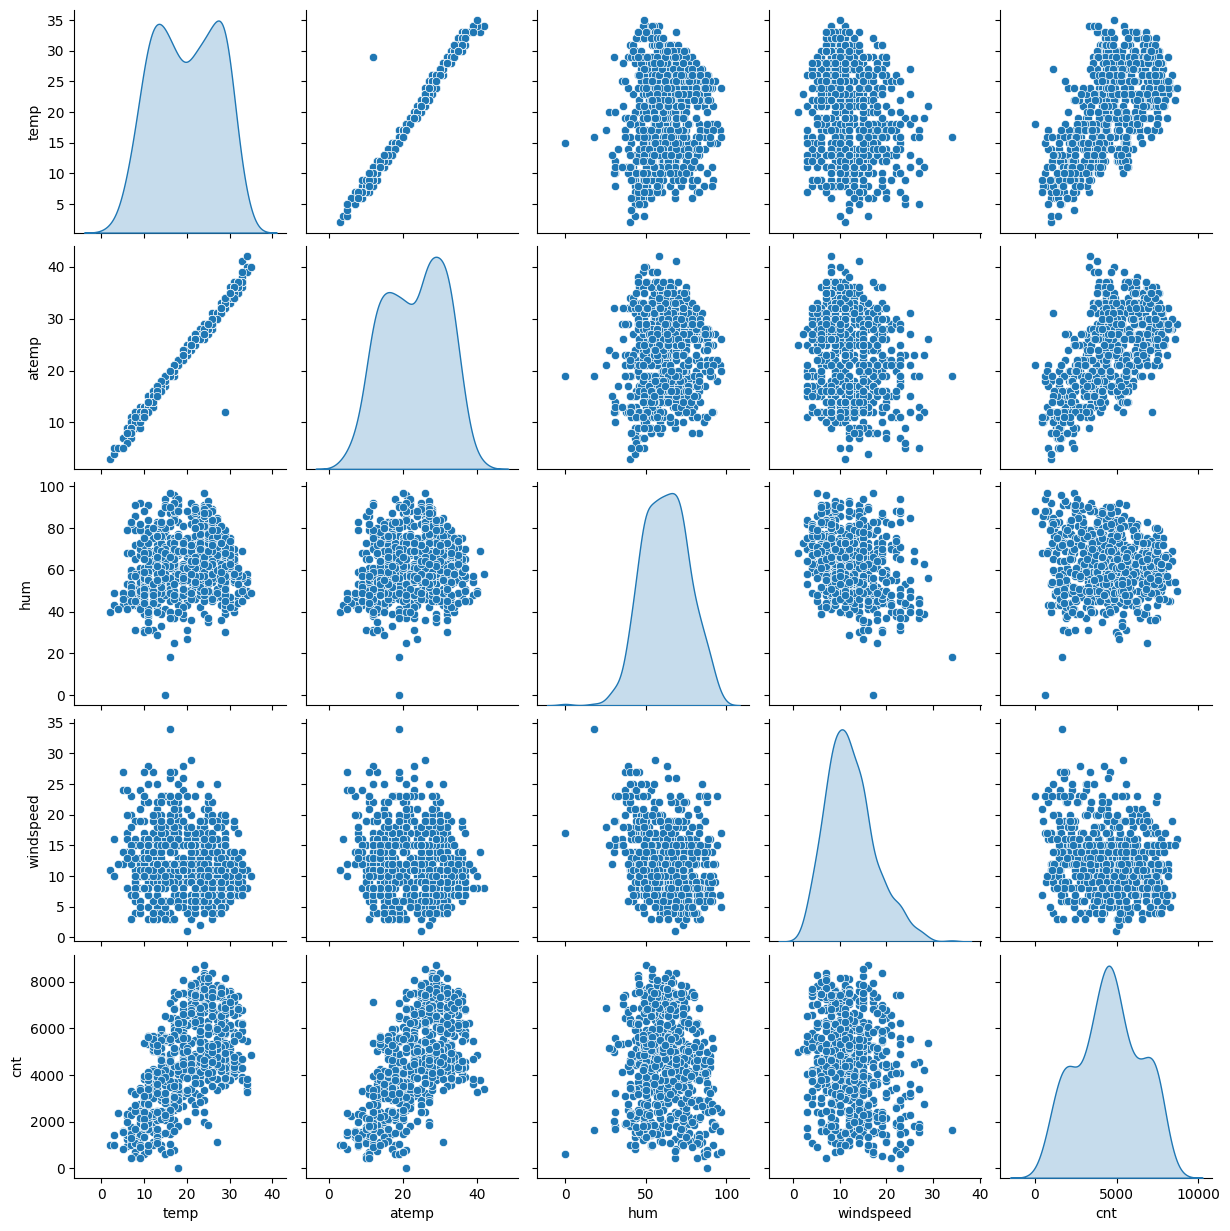

In [17]:
bike_num=df_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### **Insight**

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

### Scaling

In [20]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Creating and Perfrom the Prediction


*   Create the Model of Linear Regression
*   Train the Model using X_train and Y_train
*   Perfrom the Predication using X-test



In [25]:
# Create the Model of Linear Regression
model = LinearRegression()

# Train the Model
model.fit(X_train_scaled, y_train)

# Perfrom the Predication
y_pred = model.predict(X_test_scaled)

## Model Evalution and Accuracy

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 48185.12581462649
Mean Squared Error (MSE): 3226244819.4967756
Root Mean Squared Error (RMSE): 56800.042425131825
R-squared Score: -941.5631827485487
